In [35]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from chromatix.elements import FFLens
from chromatix.field import ScalarField

In [36]:
key = jax.random.PRNGKey(0)

In [ ]:
fflens = FFLens(
    f=100,  # focal length in microns
    n=1.33,  # refractive index
    NA=0.8,  # numerical aperture
)

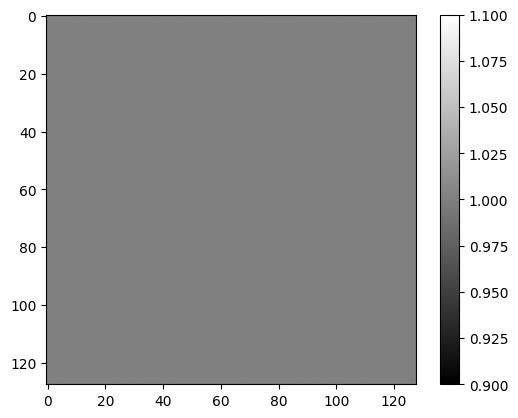

In [73]:
input = jnp.ones((1, 128, 128, 1, 1), dtype=jnp.complex64)
plt.imshow(jnp.abs(input[0, ..., 0]), cmap="gray")
plt.colorbar()
plt.show()

In [74]:
input_field = ScalarField.create(
    dx=1,  # spacing in microns
    spectrum=0.532,  # wavelength in microns
    spectral_density=1.0,
    u=input,
    shape=(128, 128),
)

In [75]:
input_field.dx

Array([[[[[[1]]]]],




       [[[[[1]]]]]], dtype=int32, weak_type=True)

In [76]:
params = fflens.init(key, input_field)

In [77]:
# Try this approach if the above doesn't work
output_field = fflens.apply(
    params,  # Empty params if no learnable parameters
    input_field,
)

dx: [[[[[[0.3125]]]]]




 [[[[[0.3125]]]]]] spectrum [[[[[0.532]]]]] spectral_density [[[[[1.]]]]] shape (1, 128, 128, 1, 1)


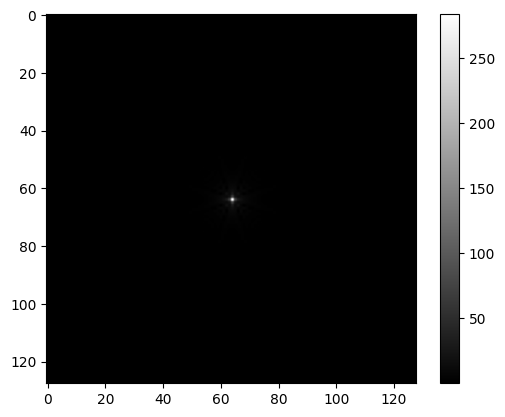

In [79]:
print(
    "dx:",
    output_field.dx,
    "spectrum",
    output_field.spectrum,
    "spectral_density",
    output_field.spectral_density,
    "shape",
    output_field.shape,
)
plt.imshow(jnp.abs(output_field.u[0, ..., 0]), cmap="gray")
plt.colorbar()
plt.show()

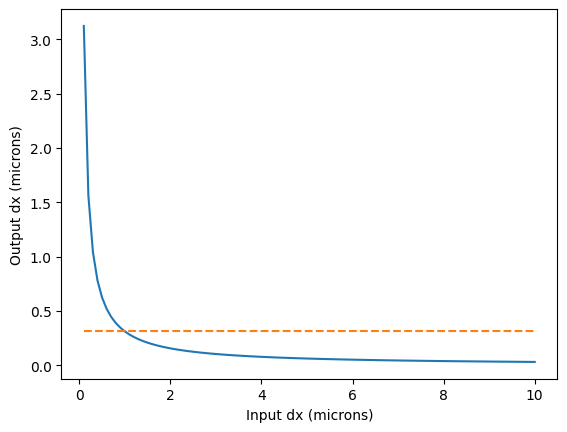

In [64]:
input_dxes = jnp.linspace(0.1, 10, 100)
output_dxes = jnp.zeros_like(input_dxes)
for i, dx in enumerate(input_dxes):
    input_field = ScalarField.create(
        dx=dx,  # spacing in microns
        spectrum=0.532,  # wavelength in microns
        spectral_density=1.0,
        u=input,
        shape=(128, 128),
    )
    output_field = fflens.apply(
        params,  # Empty params if no learnable parameters
        input_field,
    )
    output_dxes = output_dxes.at[i].set(output_field.dx[0, 0, 0, 0, 0, 0])

plt.plot(input_dxes, output_dxes, label="FFLens Output dx")
plt.plot(input_dxes, input_dxes * output_dxes, label="Input dx", linestyle="--")
plt.xlabel("Input dx (microns)")
plt.ylabel("Output dx (microns)")
plt.show()

In [65]:
input_dxes * output_dxes

Array([0.3125    , 0.31249997, 0.3125    , 0.3125    , 0.3125    ,
       0.3125    , 0.3125    , 0.3125    , 0.3125    , 0.3125    ,
       0.3125    , 0.3125    , 0.3125    , 0.3125    , 0.3125    ,
       0.3125    , 0.3125    , 0.3125    , 0.3125    , 0.3125    ,
       0.3125    , 0.3125    , 0.3125    , 0.3125    , 0.3125    ,
       0.3125    , 0.3125    , 0.3125    , 0.31249997, 0.3125    ,
       0.31250003, 0.3125    , 0.3125    , 0.3125    , 0.3125    ,
       0.3125    , 0.31250003, 0.3125    , 0.3125    , 0.3125    ,
       0.3125    , 0.3125    , 0.3125    , 0.3125    , 0.31249997,
       0.3125    , 0.31249997, 0.3125    , 0.3125    , 0.3125    ,
       0.3125    , 0.3125    , 0.3125    , 0.3125    , 0.3125    ,
       0.3125    , 0.3125    , 0.3125    , 0.3125    , 0.3125    ,
       0.3125    , 0.31250003, 0.3125    , 0.31249997, 0.3125    ,
       0.3125    , 0.3125    , 0.3125    , 0.3125    , 0.3125    ,
       0.3125    , 0.3125    , 0.3125    , 0.31249997, 0.3125 

In [ ]:
0.532 * 100 / 128 / 1.33  # spacing_in * spacing_out = wavelength * focal_length / refractive_index / shape_per_axis

0.3125

In [80]:
1 * 1 / 0.532 * 1000 * 1.33

2500.0